In [1]:
import pandas as pd

# Load the datasets
columns_df = pd.read_csv('/content/columns.csv')
responses_df = pd.read_csv('/content/responses.csv')

# Display the first few rows of each dataset to understand their structure
columns_head = columns_df.head()
responses_head = responses_df.head()

columns_head, responses_head

(                      original                     short
 0  I enjoy listening to music.                     Music
 1                    I prefer.  Slow songs or fast songs
 2           Dance, Disco, Funk                     Dance
 3                   Folk music                      Folk
 4                      Country                   Country,
    Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
 0    5.0                       3.0    2.0   1.0      2.0              2.0   
 1    4.0                       4.0    2.0   1.0      1.0              1.0   
 2    5.0                       5.0    2.0   2.0      3.0              4.0   
 3    5.0                       3.0    2.0   1.0      1.0              1.0   
 4    5.0                       3.0    4.0   3.0      2.0              4.0   
 
    Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
 0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
 1      2.0  3.0   5.0               

In [2]:
# Checking for missing values in the responses dataset
missing_values = responses_df.isnull().sum()

# Displaying the columns with missing values along with the count of missing values
missing_values_summary = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_summary

Weight              20
Height              20
Passive sport       15
Chemistry           10
Geography            9
                    ..
Ageing               1
Keeping promises     1
Politics             1
Thriller             1
Storm                1
Length: 144, dtype: int64

In [3]:
# Setting a threshold for maximum allowable percentage of missing values for a column
max_missing_threshold = 0.05  # 5%

# Calculate the total number of rows for percentage calculation
total_rows = responses_df.shape[0]

# Identify columns to drop based on the threshold
columns_to_drop = missing_values_summary[missing_values_summary / total_rows > max_missing_threshold].index

# Dropping these columns from the dataset
responses_df_cleaned = responses_df.drop(columns=columns_to_drop)

# Apply median imputation for the remaining columns with missing values
responses_df_cleaned.fillna(responses_df_cleaned.median(), inplace=True)

# Check if there are any missing values left
remaining_missing_values = responses_df_cleaned.isnull().sum().sum()

# Summary of actions taken and remaining missing values
columns_dropped_count = len(columns_to_drop)
remaining_missing_values, columns_dropped_count, columns_to_drop.tolist()

<ipython-input-3-ed9c89af8459>:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  responses_df_cleaned.fillna(responses_df_cleaned.median(), inplace=True)


(37, 0, [])

In [4]:
# Identify non-numeric columns
non_numeric_columns = responses_df_cleaned.select_dtypes(include=['object']).columns

# Apply mode imputation for these non-numeric columns
for column in non_numeric_columns:
    mode_value = responses_df_cleaned[column].mode()[0]
    responses_df_cleaned[column].fillna(mode_value, inplace=True)

# Check if there are still any missing values
remaining_missing_values_after_imputation = responses_df_cleaned.isnull().sum().sum()

# If there are still missing values, we will consider row-wise deletion
rows_with_missing_values = None
if remaining_missing_values_after_imputation > 0:
    rows_with_missing_values = responses_df_cleaned[responses_df_cleaned.isnull().any(axis=1)]

remaining_missing_values_after_imputation, rows_with_missing_values.shape[0] if rows_with_missing_values is not None else 0

(0, 0)

In [5]:
# Isolating numeric columns
numeric_columns = responses_df_cleaned.select_dtypes(include=['number']).columns
numeric_data = responses_df_cleaned[numeric_columns]

# Calculating the range of values for numeric columns
numeric_column_ranges = numeric_data.max() - numeric_data.min()

# Displaying the ranges to determine the need for normalization
numeric_column_ranges_summary = numeric_column_ranges.describe()
numeric_column_ranges_summary

count    139.000000
mean       5.964029
std       15.414754
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max      141.000000
dtype: float64

In [6]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Applying Z-score standardization to numeric columns
normalized_data = scaler.fit_transform(numeric_data)

# Creating a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Checking the first few rows of the normalized dataset
normalized_df_head = normalized_df.head()
normalized_df_head

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,0.403273,-0.393510,-0.953054,-1.133326,-0.114423,-0.766617,-1.399805,1.316768,1.047205,-0.992690,...,0.580059,1.494582,-0.169377,-0.088064,-1.456239,-0.511229,-0.152845,-1.058867,-1.340053,-0.293082
1,-1.105266,0.807231,-0.953054,-1.133326,-1.046416,-1.568153,-0.605534,-0.408181,1.047205,1.196429,...,0.580059,-1.572006,0.673337,-0.919324,1.658216,-1.426727,-0.507726,-1.058867,-0.610074,0.696929
2,0.403273,2.007971,-0.953054,-0.252819,0.817570,0.836454,1.777281,-0.408181,1.047205,0.466723,...,0.580059,-1.572006,0.673337,-0.088064,0.879602,-1.426727,-0.152845,0.251617,0.046907,0.696929
3,0.403273,-0.393510,-0.953054,-1.133326,-1.046416,-1.568153,-1.399805,-1.270656,-1.493253,-0.992690,...,0.580059,-0.038712,-0.169377,0.743196,0.879602,-2.342225,0.556918,-0.151609,-0.537077,-0.293082
4,0.403273,-0.393510,0.759730,0.627688,-0.114423,0.836454,0.188738,1.316768,-0.646433,-0.992690,...,-0.176865,0.727935,-0.169377,-0.088064,-0.677625,0.404270,-0.152845,-0.353222,-0.537077,-0.293082


In [7]:
# Extracting non-numeric data from the original cleaned dataset
non_numeric_data = responses_df_cleaned[non_numeric_columns]

# Combining the normalized numeric data with the non-numeric data
combined_df = pd.concat([normalized_df, non_numeric_data], axis=1)

# Checking the structure of the combined dataset
combined_df_structure = {
    "Total Columns": combined_df.shape[1],
    "Total Rows": combined_df.shape[0],
    "Sample Data": combined_df.head()
}

combined_df_structure

{'Total Columns': 150,
 'Total Rows': 1010,
 'Sample Data':       Music  Slow songs or fast songs     Dance      Folk   Country  \
 0  0.403273                 -0.393510 -0.953054 -1.133326 -0.114423   
 1 -1.105266                  0.807231 -0.953054 -1.133326 -1.046416   
 2  0.403273                  2.007971 -0.953054 -0.252819  0.817570   
 3  0.403273                 -0.393510 -0.953054 -1.133326 -1.046416   
 4  0.403273                 -0.393510  0.759730  0.627688 -0.114423   
 
    Classical music   Musical       Pop      Rock  Metal or Hardrock  ...  \
 0        -0.766617 -1.399805  1.316768  1.047205          -0.992690  ...   
 1        -1.568153 -0.605534 -0.408181  1.047205           1.196429  ...   
 2         0.836454  1.777281 -0.408181  1.047205           0.466723  ...   
 3        -1.568153 -1.399805 -1.270656 -1.493253          -0.992690  ...   
 4         0.836454  0.188738  1.316768 -0.646433          -0.992690  ...   
 
           Alcohol              Punctuality

In [8]:
from sklearn.manifold import MDS

# Setting the number of components for MDS
n_components = 2  # Reducing the data to 2 dimensions

# Initializing the MDS object
# Using a random state for reproducibility
mds = MDS(n_components=n_components, random_state=42)

# Since MDS is computationally intensive, we'll use a sample of the dataset
# Selecting a random sample of 300 rows for demonstration purposes
sampled_data = combined_df.sample(300, random_state=42)

# Applying MDS to the sampled dataset
# Note: Only using numeric data as MDS requires numerical input
mds_results = mds.fit_transform(sampled_data[numeric_columns])

# Creating a DataFrame for the MDS results
mds_df = pd.DataFrame(mds_results, columns=['Dimension 1', 'Dimension 2'])

# Checking the first few rows of the MDS results
mds_df_head = mds_df.head()
mds_df_head

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


,Dimension 1,Dimension 2
0,8.804271,-9.728479
1,-4.018967,-2.650285
2,0.629316,-11.995408
3,-11.086315,-11.642841
4,9.383716,3.224927


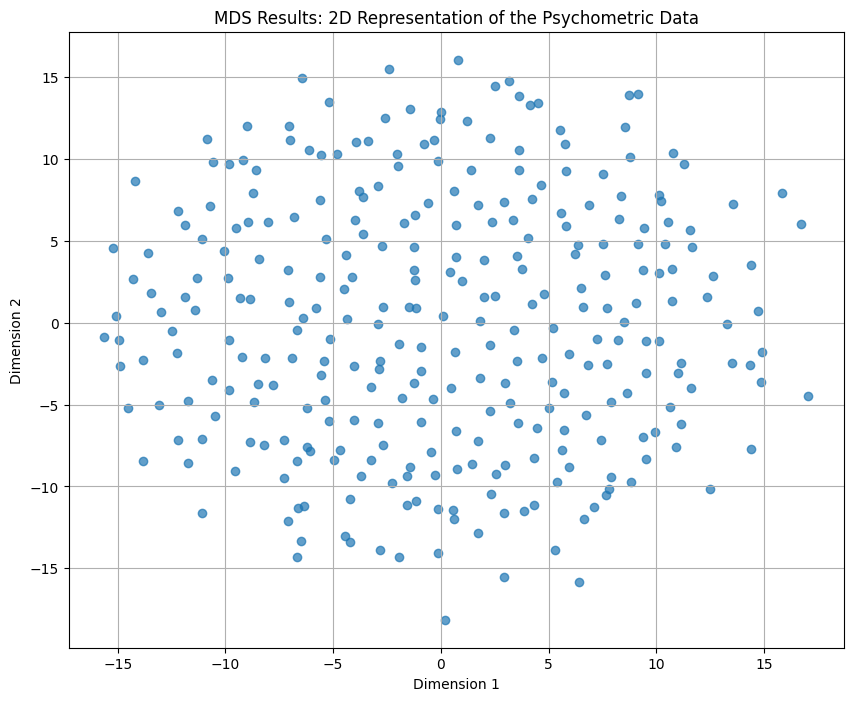

In [9]:
import matplotlib.pyplot as plt

# Plotting the results of MDS
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'], alpha=0.7)
plt.title('MDS Results: 2D Representation of the Psychometric Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()